In [130]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
import warnings

warnings.filterwarnings(action='ignore') 






In [7]:
pd.set_option('display.max_columns', 60)

In [10]:
with open('/Users/riversong/Desktop/Fastcampus/regression/Regression_project/kang/premierleague_players.pkl', 'rb') as f:
    premier_df = pickle.load(f)

In [11]:
premier_df

,name_x,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM
0,Ederson,50400000.0,32,23,17,3,0,0,27,188,1,Goalkeeper,left,Gestifute,Manchester City,2017-7-1,2025-6-30,2018-5-13,Puma,3,0.1,0,0,0,0.5,0,0,0,1,0,26.5,81.7,0,4.3,0,6.57,0,0,0,0.1,0,0,0.1,0.2,0
1,ZackSteffen,5400000.0,1,1,0,0,0,0,26,191,1,Goalkeeper,right,Wasserman,Manchester City,2019-7-9,2023-6-30,2018-5-13,Nike,2,0,0,1,0,0,0,0,0,0,0,26.0,80.8,0,1,0,6.07,0,0,0,0,0,0,0,0.0,0
2,RúbenDias,63000000.0,29,1,0,3,0,0,23,187,1,Defender,right,Gestifute,Manchester City,2020-9-29,2026-6-30,2020-8-19,Nike,2,0.7,1.1,0.7,0.3,2.8,0.2,0.7,1,0,0.1,86.1,93.4,0,3.6,0,6.95,1,0.4,0.2,0.6,0,0.1,0.3,1.9,0
3,AymericLaporte,45000000.0,14,0,0,1,0,0,26,189,1,Defender,left,Wasserman,Manchester City,2018-1-30,2025-6-30,2019-2-22,adidas,3,0.7,0.6,0.6,0.4,1.8,0.2,0.5,0,0,0.1,77.1,90.7,0,2.4,0,6.73,0,0.4,0.1,0.6,0.1,0.1,0.6,2.7,0
4,NathanAké,31500000.0,7,1,0,4,0,0,26,180,1,Defender,left,Wasserman,Manchester City,2020-8-5,2025-6-30,2019-2-22,Nike,3,0.4,0.9,0.6,0.6,1.6,0,0.1,0,0,0.1,71.4,93.0,0,1.0,0,6.61,1,0.3,0,0.6,0,0.1,0,2.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,RobertSnodgrass,1800000.0,11,0,0,2,0,0,33,182,1,attack,left,SMI Sports Management,West Bromwich Albion,2021-1-8,2022-6-30,2019-8-31,Nike,2,2.1,0.1,1.0,0.1,1.5,0.8,0.3,0,0,0.4,16.5,78.8,0.4,0.5,0,6.51,0,0.5,0.5,1.6,0.1,0.5,1.0,1.1,0
434,KarlanGrant,8100000.0,18,1,0,1,0,0,23,183,1,attack,right,ICM Stellar Sports,West Bromwich Albion,2020-10-15,2026-6-30,2019-8-31,adidas,2,0.3,0.3,0.5,0,0.8,0.1,0,0,0,0.2,11.7,75.2,0,0.1,0,6.19,1,0.9,0.5,0.7,0.3,0.8,1.7,0.7,1
435,CallumRobinson,5400000.0,25,5,0,0,0,0,26,178,1,attack,right,Wasserman,West Bromwich Albion,2020-9-9,2025-6-30,2019-8-31,adidas,2,0.2,0.2,0.1,0,0.3,0.6,0,0,0,0.6,14.4,74.0,0.2,0.4,0,6.44,5,1,0.6,0.7,0.3,0.8,1.5,0.7,1
436,MbayeDiagne,2700000.0,13,2,2,2,0,0,29,191,1,attack,right,GOAL CLUB,West Bromwich Albion,2021-1-29,2021-6-30,2019-8-31,adidas,1,0.3,0.1,1,0,1.0,0.2,0.1,0,2,0.6,15.8,63.6,0.2,0.6,0,6.76,2,1.7,0.8,1.6,1.2,1.2,1.6,3.6,1


In [22]:
premier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name_x          438 non-null    object        
 1   market_value    438 non-null    int64         
 2   app             438 non-null    int64         
 3   conceded_goals  438 non-null    int64         
 4   clean_sheets    438 non-null    int64         
 5   yellow_card     438 non-null    int64         
 6   second_yell     438 non-null    int64         
 7   red_card        438 non-null    int64         
 8   age             438 non-null    int64         
 9   height          438 non-null    int64         
 10  citizenship     438 non-null    int64         
 11  position        438 non-null    object        
 12  foot            438 non-null    object        
 13  agent           438 non-null    object        
 14  club            438 non-null    object        
 15  joined

In [61]:
# premier_df_num = premier_df.drop(['name_x','position','foot','agent','club','joined','expire','last_contract',
#                                  'outfitter'],axis=1)
premier_df_num.drop('citizenship',inplace=True, axis=1)
len(premier_df_num.columns)

35

In [34]:
premier_df_num #수치형 컬럼만 있는 data Frame

,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM
0,50400000,32,23,17,3,0,0,27,188,1,3,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,1.0,0.0,26.5,81.7,0.0,4.3,0.0,6.57,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.2,0.0
1,5400000,1,1,0,0,0,0,26,191,1,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,80.8,0.0,1.0,0.0,6.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,63000000,29,1,0,3,0,0,23,187,1,2,0.7,1.1,0.7,0.3,2.8,0.2,0.7,1.0,0.0,0.1,86.1,93.4,0.0,3.6,0.0,6.95,1.0,0.4,0.2,0.6,0.0,0.1,0.3,1.9,0.0
3,45000000,14,0,0,1,0,0,26,189,1,3,0.7,0.6,0.6,0.4,1.8,0.2,0.5,0.0,0.0,0.1,77.1,90.7,0.0,2.4,0.0,6.73,0.0,0.4,0.1,0.6,0.1,0.1,0.6,2.7,0.0
4,31500000,7,1,0,4,0,0,26,180,1,3,0.4,0.9,0.6,0.6,1.6,0.0,0.1,0.0,0.0,0.1,71.4,93.0,0.0,1.0,0.0,6.61,1.0,0.3,0.0,0.6,0.0,0.1,0.0,2.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1800000,11,0,0,2,0,0,33,182,1,2,2.1,0.1,1.0,0.1,1.5,0.8,0.3,0.0,0.0,0.4,16.5,78.8,0.4,0.5,0.0,6.51,0.0,0.5,0.5,1.6,0.1,0.5,1.0,1.1,0.0
434,8100000,18,1,0,1,0,0,23,183,1,2,0.3,0.3,0.5,0.0,0.8,0.1,0.0,0.0,0.0,0.2,11.7,75.2,0.0,0.1,0.0,6.19,1.0,0.9,0.5,0.7,0.3,0.8,1.7,0.7,1.0
435,5400000,25,5,0,0,0,0,26,178,1,2,0.2,0.2,0.1,0.0,0.3,0.6,0.0,0.0,0.0,0.6,14.4,74.0,0.2,0.4,0.0,6.44,5.0,1.0,0.6,0.7,0.3,0.8,1.5,0.7,1.0
436,2700000,13,2,2,2,0,0,29,191,1,1,0.3,0.1,1.0,0.0,1.0,0.2,0.1,0.0,2.0,0.6,15.8,63.6,0.2,0.6,0.0,6.76,2.0,1.7,0.8,1.6,1.2,1.2,1.6,3.6,1.0


In [48]:
premier_df_num_att = premier_df[['foot','market_value','Goals','Drb','Fouled','Off','Disp','UnsTch','AerialsWon','MotM']]

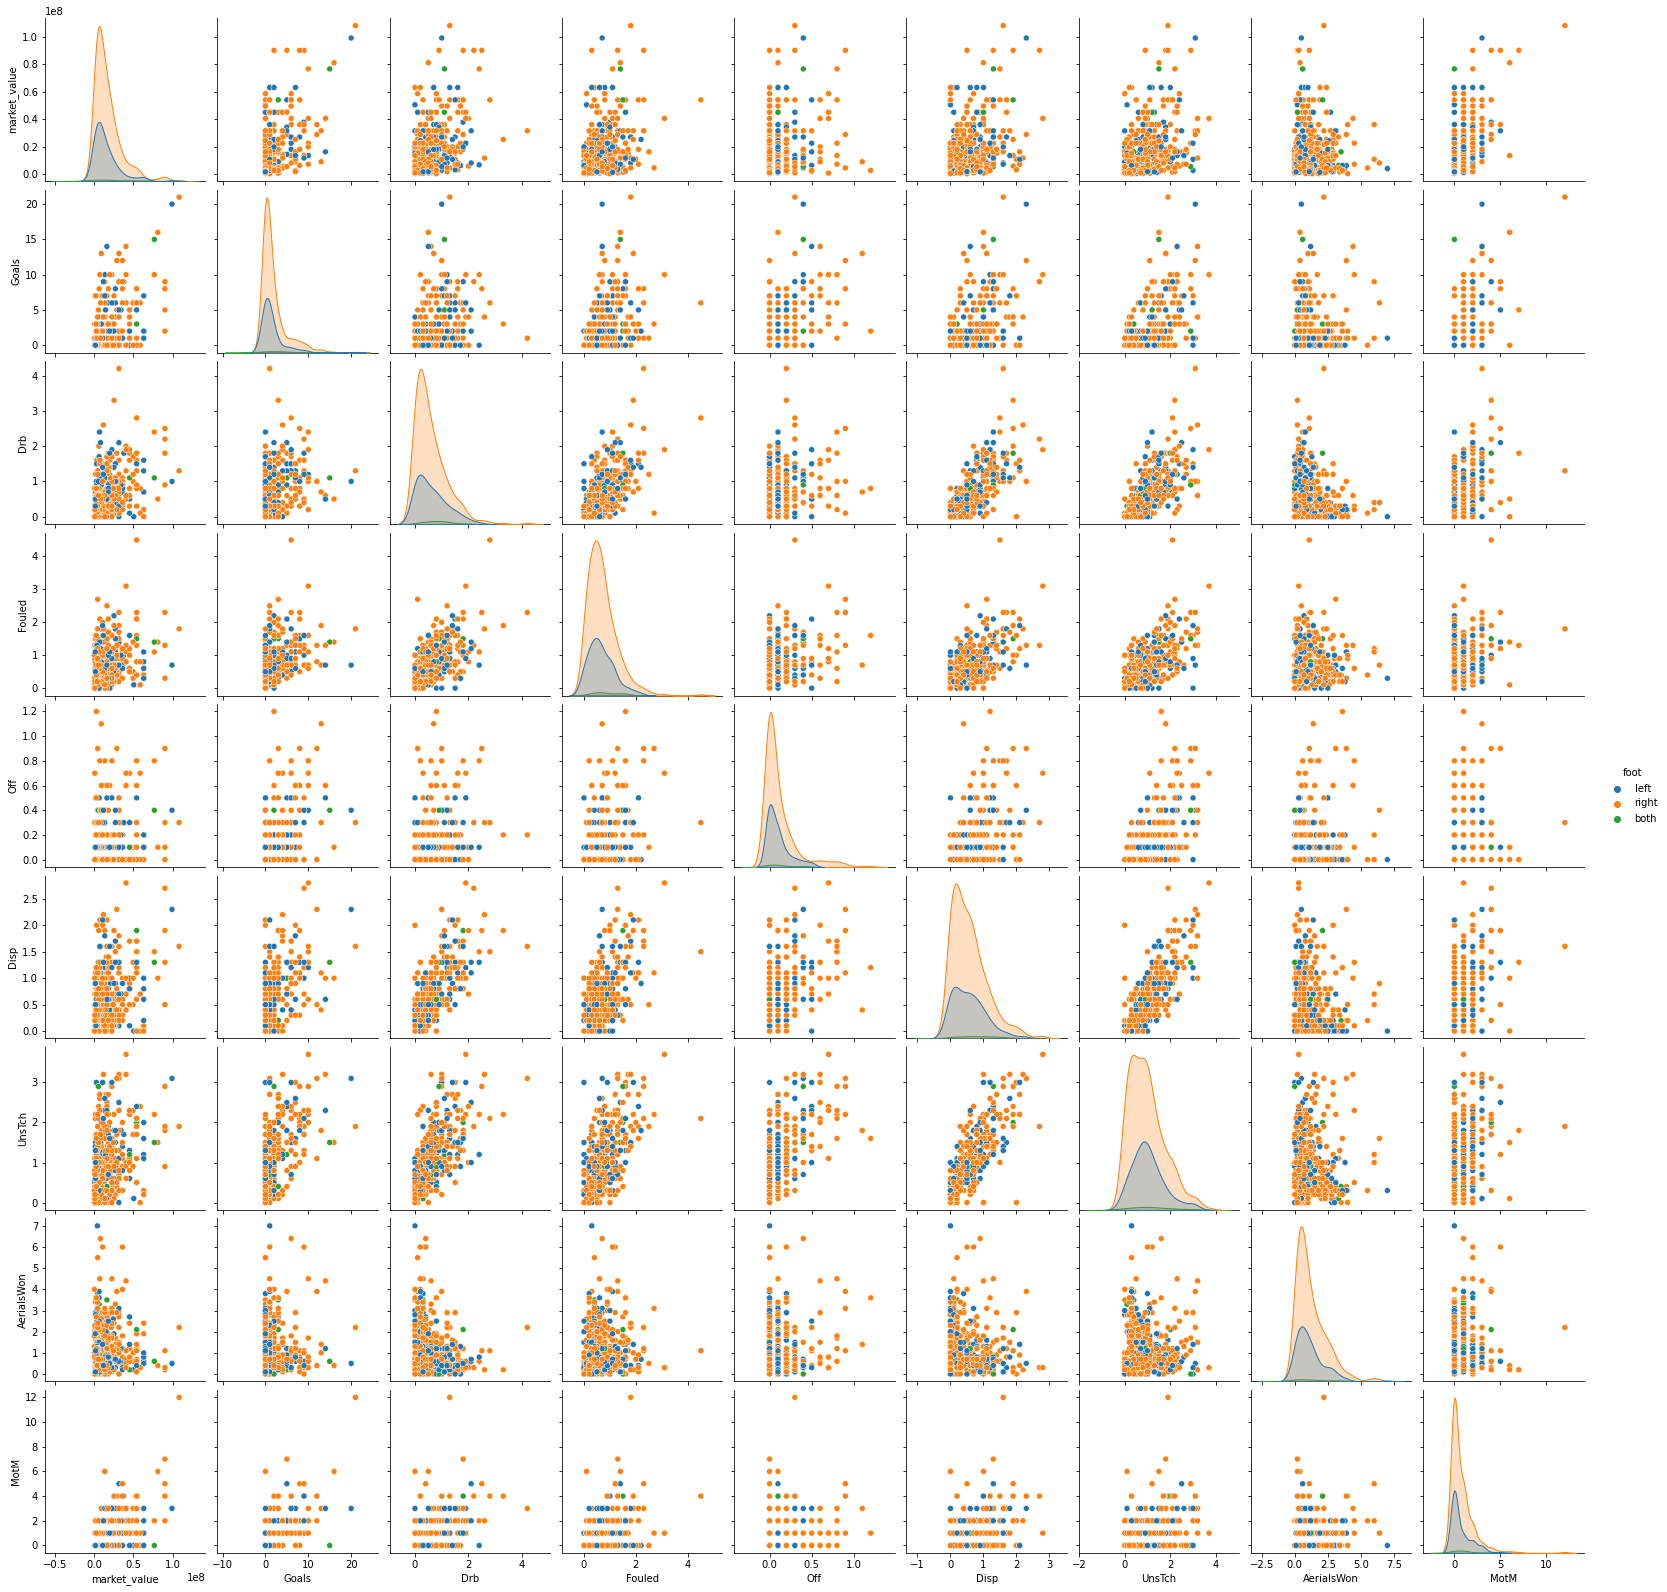

In [49]:
sns.pairplot(premier_df_num_att,hue='foot')

<AxesSubplot:>

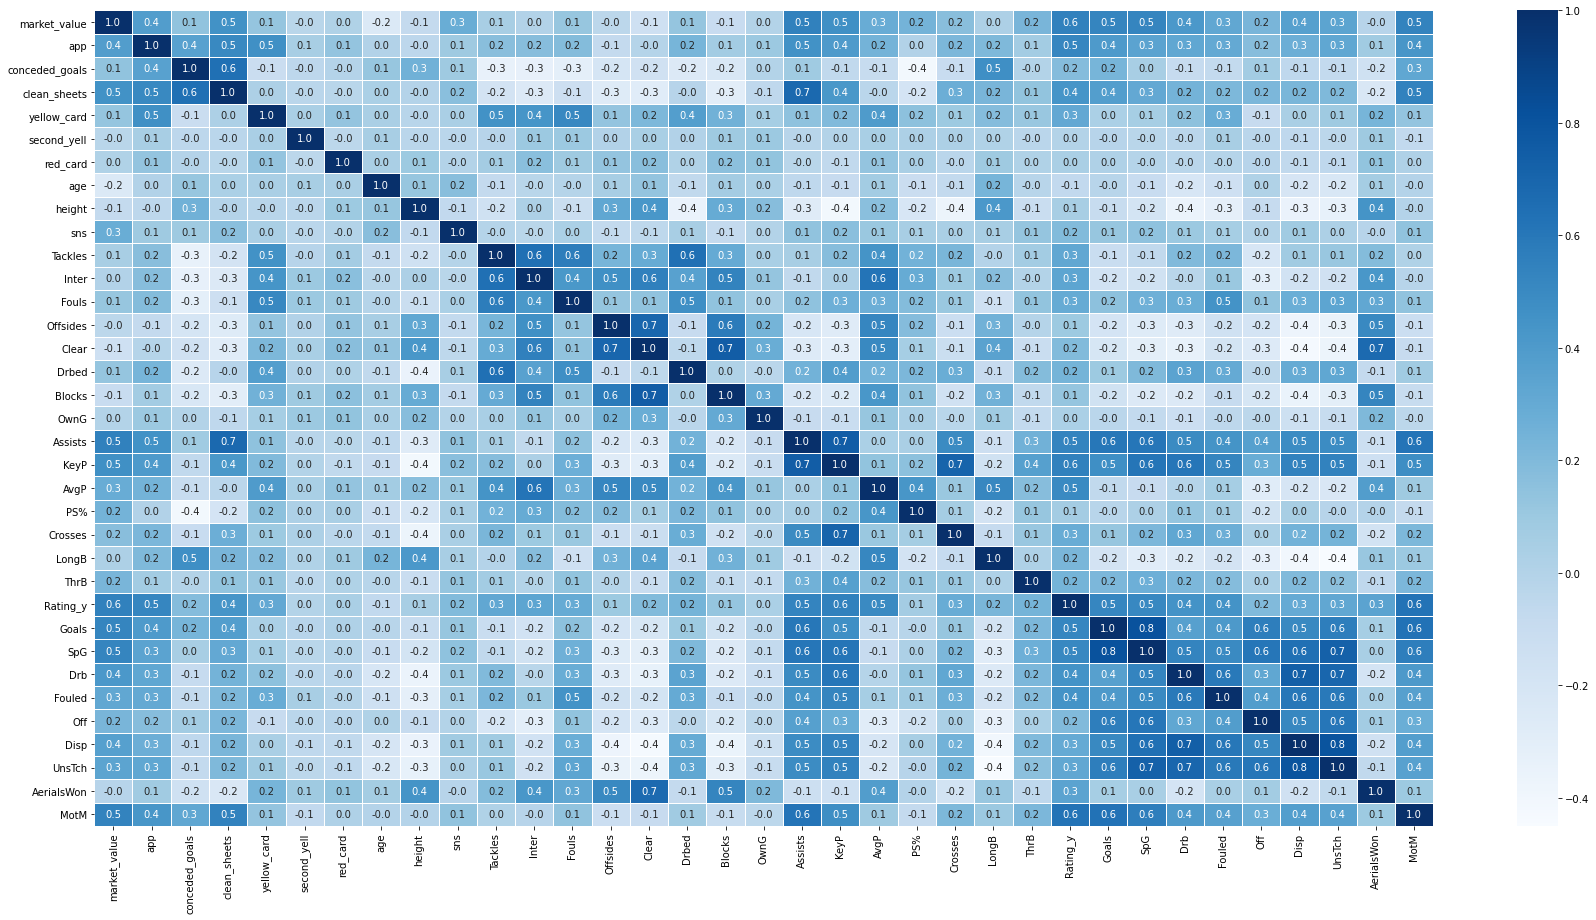

In [71]:
# 전체 선수대상 상관관계 히트맵
plt.figure(figsize=(30,15))
sns.heatmap(data = premier_df_num.corr(), annot=True, 
fmt = '.1f', linewidths=.5, cmap='Blues')

In [65]:
# 공격수 히트맵
attack_df = premier_df_num[premier_df['position']=='attack']

<AxesSubplot:>

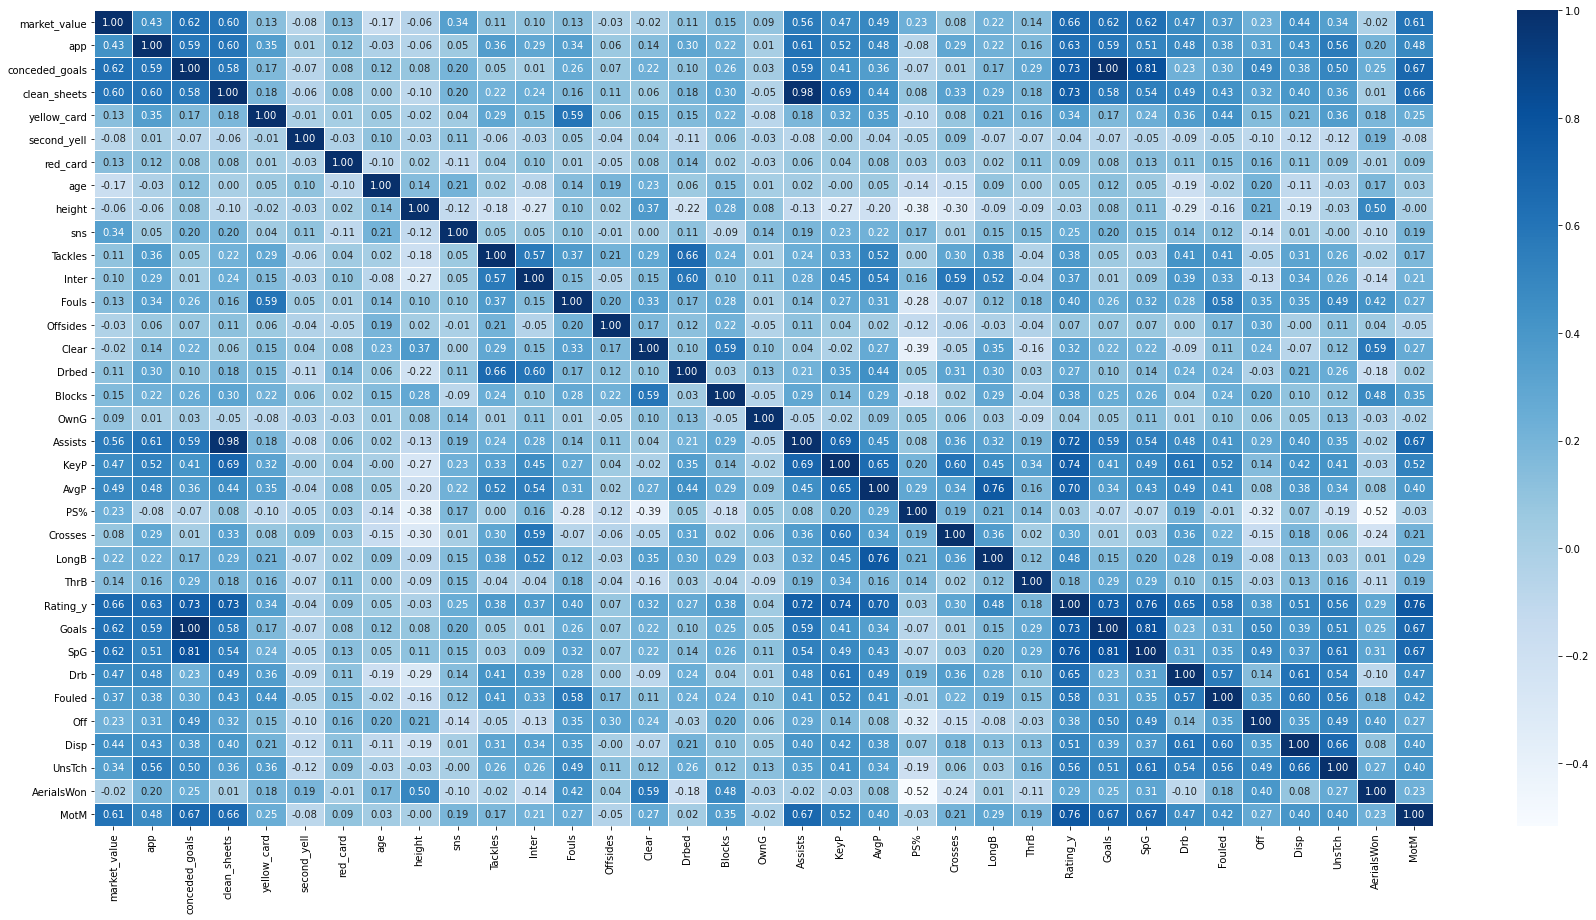

In [70]:
plt.figure(figsize=(30,15))
sns.heatmap(data = attack_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:>

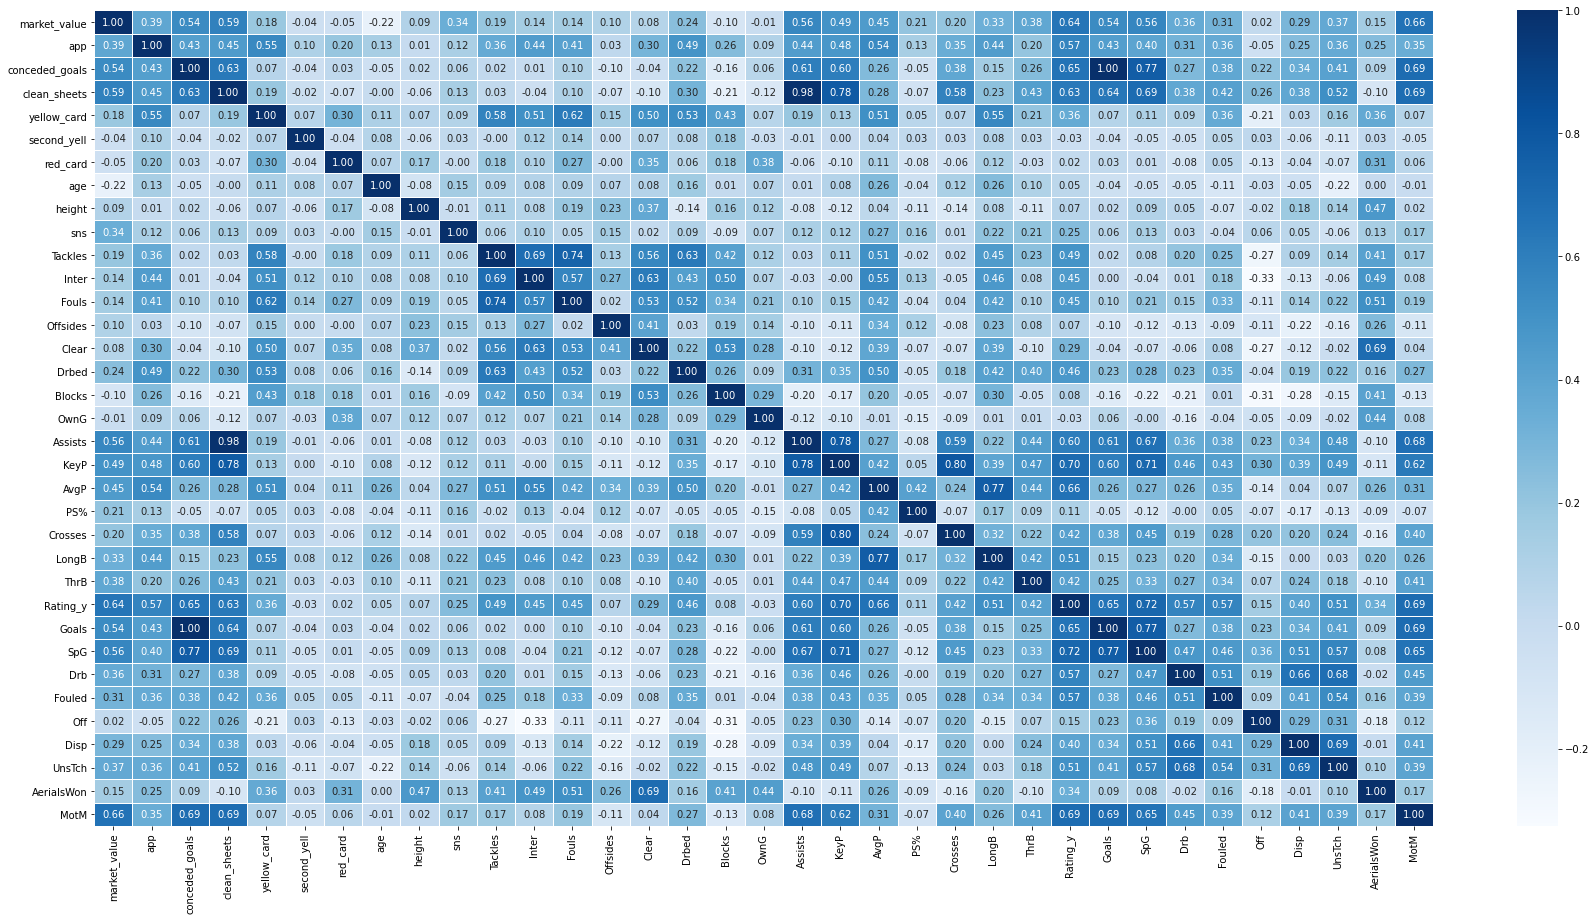

In [72]:
midfield_df = premier_df_num[premier_df['position']=='midfield']
plt.figure(figsize=(30,15))
sns.heatmap(data = midfield_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:>

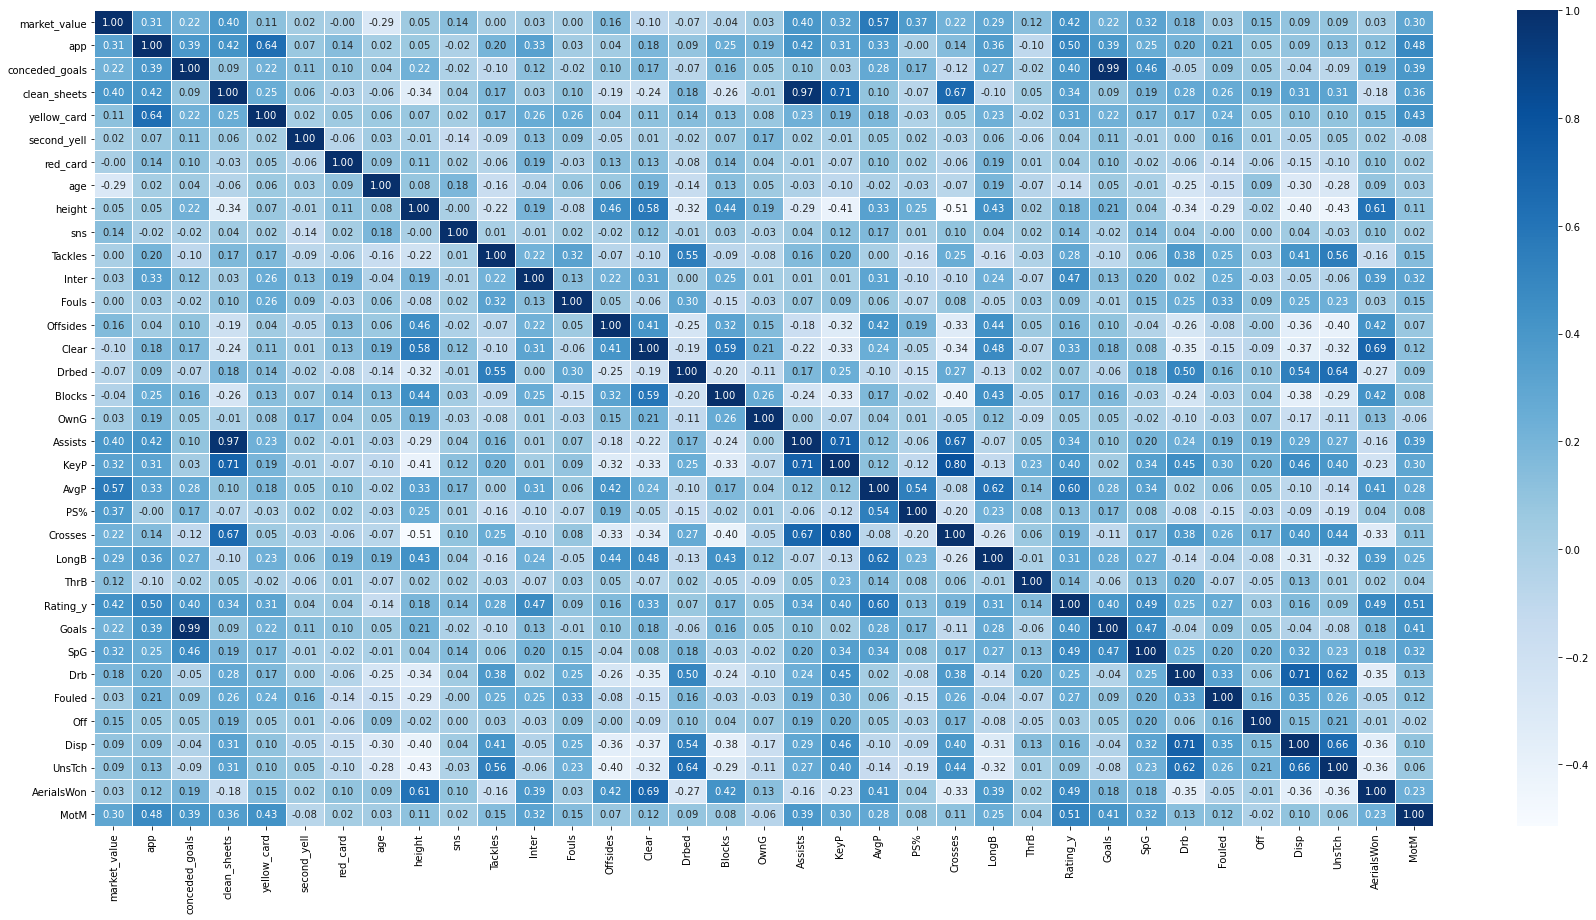

In [73]:
defence_df = premier_df_num[premier_df['position']=='Defender']
plt.figure(figsize=(30,15))
sns.heatmap(data = defence_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [74]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()
maxabs = MaxAbsScaler()

In [104]:
standard.fit(premier_df_num_att)
standard_att = standard.transform(premier_df_num_att)

In [105]:
standard_att.shape

(438, 9)

In [106]:
standard_att[1]

array([-0.63378736, -0.59429589, -1.01920355, -1.2630324 , -0.58917779,
       -1.09077525, -1.30585009, -1.06215947, -0.59558082])

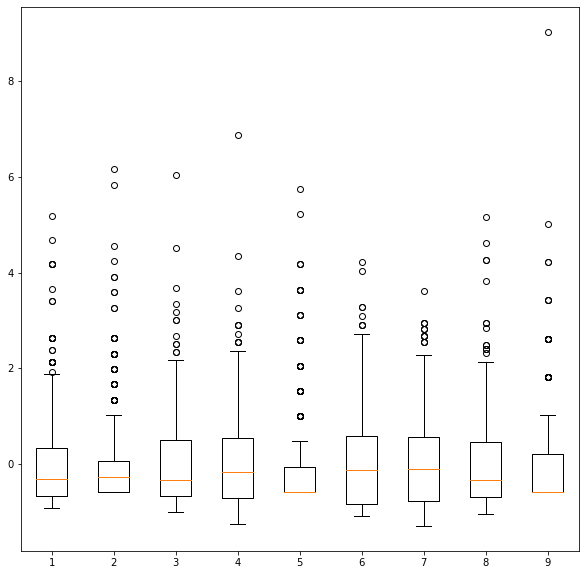

In [109]:
plt.figure(figsize=(10,10))
plt.boxplot(standard_att)
plt.show()

In [118]:
premier_df_num_att.drop('market_value',axis=1,inplace=True)

/Users/riversong/miniforge3/envs/ml/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


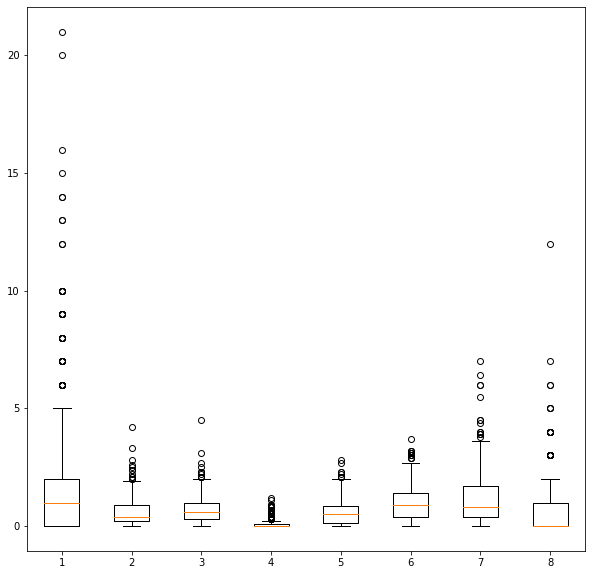

In [119]:
plt.figure(figsize=(10,10))
plt.boxplot(premier_df_num_att)
plt.show()

In [135]:
standard.fit(y_train)
standard_att = standard.transform(y_train)
standard.fit(y_test)
standard_att = standard.transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[6.30e+06 1.62e+06 2.25e+07 1.53e+07 1.26e+07 7.20e+06 5.40e+06 1.98e+07
 1.98e+07 7.20e+06 9.00e+07 2.25e+06 4.50e+07 3.60e+06 3.15e+06 2.25e+07
 1.17e+07 1.08e+07 2.25e+06 2.25e+07 2.25e+07 6.30e+06 3.15e+07 3.60e+07
 5.85e+07 3.15e+06 9.00e+05 9.00e+06 2.88e+07 1.62e+06 3.15e+07 1.98e+07
 1.62e+07 3.60e+06 1.80e+07 3.60e+06 1.08e+07 1.80e+07 1.62e+07 4.50e+06
 1.80e+06 4.50e+06 2.70e+06 5.40e+06 5.40e+06 3.60e+06 1.35e+06 6.30e+06
 2.70e+06 2.25e+07 7.20e+06 2.70e+06 4.50e+06 6.30e+07 9.00e+07 2.25e+07
 2.70e+07 1.80e+07 1.35e+06 3.15e+06 6.75e+06 1.35e+06 6.30e+06 2.70e+06
 6.30e+06 1.35e+07 9.00e+06 5.40e+06 6.30e+07 3.60e+06 2.70e+07 1.35e+07
 3.60e+06 2.70e+07 5.40e+07 1.08e+07 4.50e+06 1.35e+07 2.70e+05 4.50e+07
 5.40e+07 9.00e+06 1.35e+07 3.15e+06 5.40e+07 1.35e+07 9.90e+07 1.98e+07
 7.20e+05 5.40e+06 2.25e+07 9.00e+06 1.80e+06 1.08e+07 1.08e+07 1.80e+07
 2.25e+06 3.60e+06 3.15e+07 1.62e+07 3.15e+07 1.80e+07 2.70e+06 8.10e+07
 1.62e+07 4.95e+07 1.80e+06 2.70e+06 2.52e+07 2.70e+07 5.40e+06 1.62e+07
 1.44e+07 8.10e+06 7.20e+06 6.30e+06 1.62e+07 4.50e+06 9.00e+05 1.98e+07
 9.00e+05 2.70e+07 3.60e+06 5.40e+07 5.40e+06 9.00e+06 3.15e+07 3.60e+06
 6.30e+06 9.00e+06 1.80e+07 5.40e+06 2.25e+07 9.00e+06 2.70e+06 1.62e+07
 9.00e+06 5.40e+07 2.25e+07 9.00e+06 1.62e+06 2.16e+07 2.70e+06 6.30e+07
 9.00e+06 6.30e+06 4.50e+06 1.62e+07 4.50e+06 1.80e+07 1.44e+07 6.30e+06
 4.50e+07 5.40e+07 1.98e+07 1.44e+07 2.70e+06 1.35e+07 4.50e+06 1.80e+07
 7.20e+06 2.70e+06 1.98e+07 1.35e+07 1.08e+07 4.50e+06 2.70e+06 9.00e+06
 1.62e+06 1.35e+06 5.85e+07 1.98e+07 1.80e+07 2.70e+05 3.15e+07 1.80e+07
 4.05e+07 1.80e+06 1.62e+07 1.53e+07 9.00e+07 2.70e+07 3.15e+07 2.70e+06
 5.40e+06 1.44e+07 1.62e+07 3.60e+07 1.35e+07 2.52e+07 1.35e+07 7.65e+07
 9.00e+06 1.44e+07 1.08e+08 4.05e+06 4.95e+07 1.17e+07 1.17e+07 3.60e+06
 2.43e+07 5.85e+06 3.60e+06 9.00e+06 2.70e+07 4.50e+06 8.10e+06 1.35e+06
 4.50e+07 3.15e+06 4.50e+07 4.50e+07 3.15e+06 3.60e+05 1.80e+06 5.85e+06
 1.62e+07 2.88e+07 3.60e+07 3.15e+07 1.80e+06 1.62e+07 4.50e+06 1.35e+07
 4.05e+07 2.25e+07 1.53e+07 3.15e+07 1.80e+07 4.50e+06 9.00e+05 1.53e+07
 4.50e+06 1.35e+07 9.00e+06 3.42e+07 7.20e+06 1.62e+07 8.10e+06 2.70e+07
 2.88e+07 1.98e+07 4.50e+06 2.25e+07 7.20e+06 1.62e+07 2.88e+07 4.50e+06
 1.17e+07 4.05e+07 4.50e+06 6.30e+06 9.00e+06 2.70e+06 1.35e+07 1.17e+07
 1.35e+07 1.53e+07 1.98e+07 4.50e+06 5.40e+06 2.25e+07 8.10e+06 6.30e+07
 6.30e+06 3.15e+06 9.00e+06 3.60e+06 4.05e+07 2.25e+07 1.08e+07 9.00e+06
 9.00e+06 4.50e+06 2.25e+06 6.30e+06 6.30e+06 6.30e+06 2.25e+06 5.40e+06
 7.20e+06 5.40e+06 1.35e+07 4.50e+05 7.20e+05 4.95e+07 3.60e+05 4.50e+05
 2.52e+07 1.35e+07 1.53e+07 9.00e+05 5.40e+06 2.70e+06 3.60e+07 1.17e+07
 7.20e+06 9.00e+06 5.40e+07 1.08e+07 1.62e+06 2.70e+06 9.00e+07 2.16e+07
 1.98e+07 2.43e+07].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [125]:
X = premier_df_num.drop('market_value',axis=1)
y = premier_df_num['market_value']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=13)

In [127]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [131]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

In [132]:
print('RMSE of train Data :', rmse_tr)
print('RMSE of test Data :', rmse_test)

RMSE of train Data : 10812359.63923969
RMSE of test Data : 10121632.551098429


In [138]:
y_train.min()

270000

In [139]:
y_train.max()

108000000

/Users/riversong/miniforge3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/riversong/miniforge3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='market_value', ylabel='Density'>

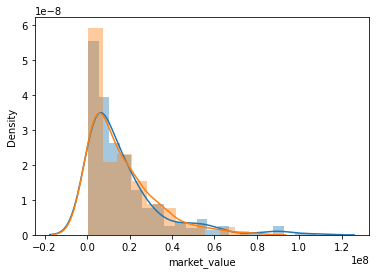

In [141]:
sns.distplot(y_train)
sns.distplot(y_test)

In [142]:
premier_df_num

,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM
0,50400000,32,23,17,3,0,0,27,188,3,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,1.0,0.0,26.5,81.7,0.0,4.3,0.0,6.57,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.2,0.0
1,5400000,1,1,0,0,0,0,26,191,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,80.8,0.0,1.0,0.0,6.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,63000000,29,1,0,3,0,0,23,187,2,0.7,1.1,0.7,0.3,2.8,0.2,0.7,1.0,0.0,0.1,86.1,93.4,0.0,3.6,0.0,6.95,1.0,0.4,0.2,0.6,0.0,0.1,0.3,1.9,0.0
3,45000000,14,0,0,1,0,0,26,189,3,0.7,0.6,0.6,0.4,1.8,0.2,0.5,0.0,0.0,0.1,77.1,90.7,0.0,2.4,0.0,6.73,0.0,0.4,0.1,0.6,0.1,0.1,0.6,2.7,0.0
4,31500000,7,1,0,4,0,0,26,180,3,0.4,0.9,0.6,0.6,1.6,0.0,0.1,0.0,0.0,0.1,71.4,93.0,0.0,1.0,0.0,6.61,1.0,0.3,0.0,0.6,0.0,0.1,0.0,2.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1800000,11,0,0,2,0,0,33,182,2,2.1,0.1,1.0,0.1,1.5,0.8,0.3,0.0,0.0,0.4,16.5,78.8,0.4,0.5,0.0,6.51,0.0,0.5,0.5,1.6,0.1,0.5,1.0,1.1,0.0
434,8100000,18,1,0,1,0,0,23,183,2,0.3,0.3,0.5,0.0,0.8,0.1,0.0,0.0,0.0,0.2,11.7,75.2,0.0,0.1,0.0,6.19,1.0,0.9,0.5,0.7,0.3,0.8,1.7,0.7,1.0
435,5400000,25,5,0,0,0,0,26,178,2,0.2,0.2,0.1,0.0,0.3,0.6,0.0,0.0,0.0,0.6,14.4,74.0,0.2,0.4,0.0,6.44,5.0,1.0,0.6,0.7,0.3,0.8,1.5,0.7,1.0
436,2700000,13,2,2,2,0,0,29,191,1,0.3,0.1,1.0,0.0,1.0,0.2,0.1,0.0,2.0,0.6,15.8,63.6,0.2,0.6,0.0,6.76,2.0,1.7,0.8,1.6,1.2,1.2,1.6,3.6,1.0


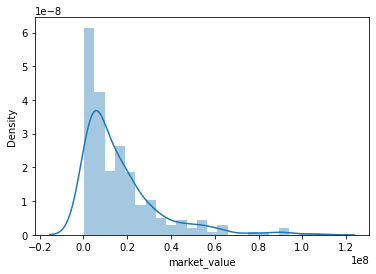

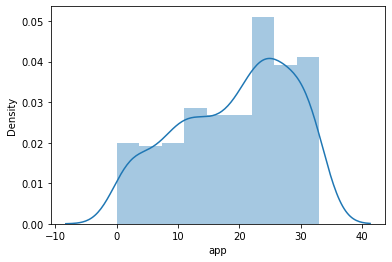

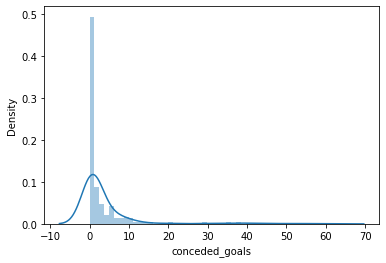

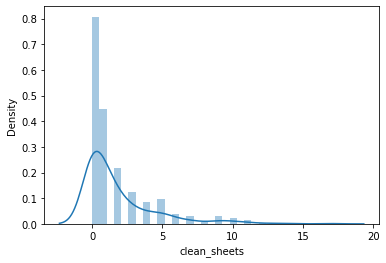

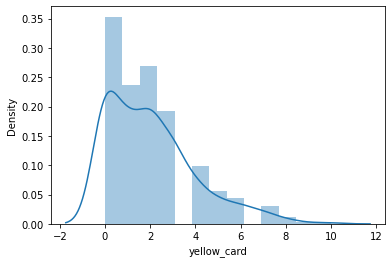

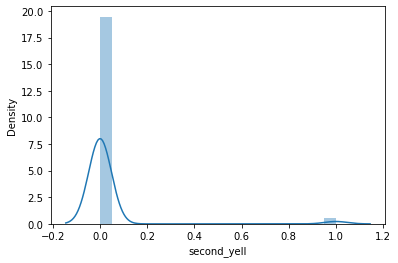

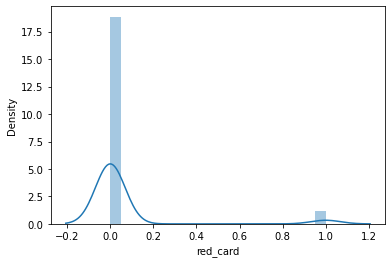

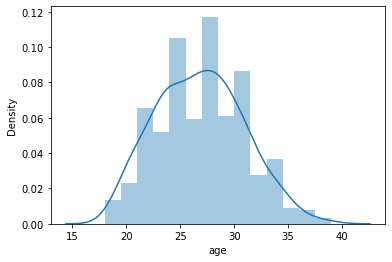

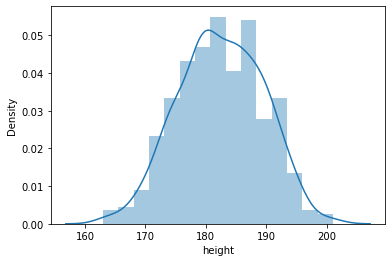

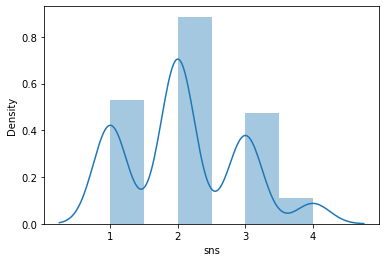

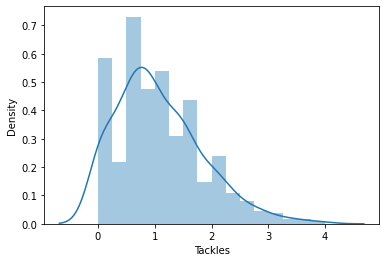

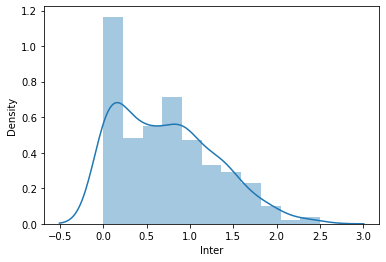

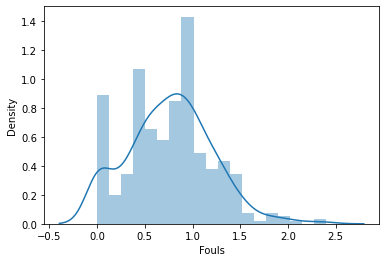

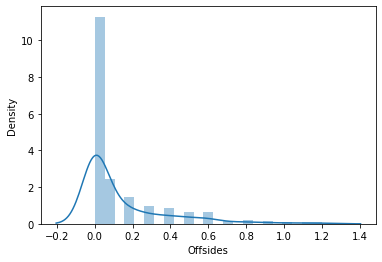

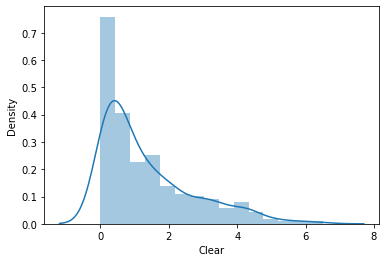

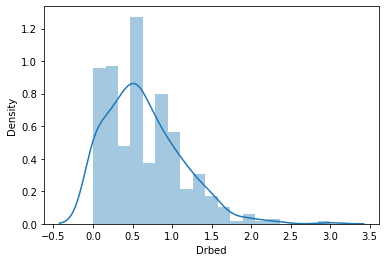

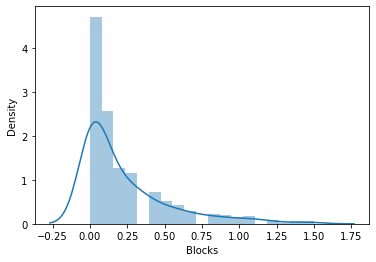

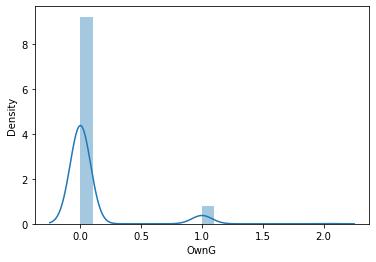

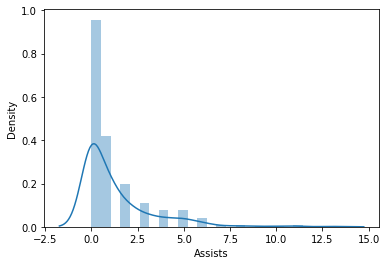

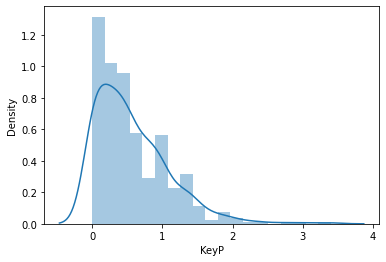

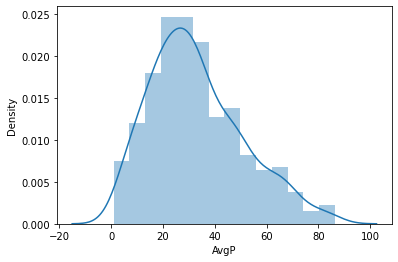

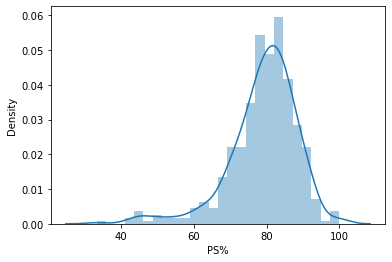

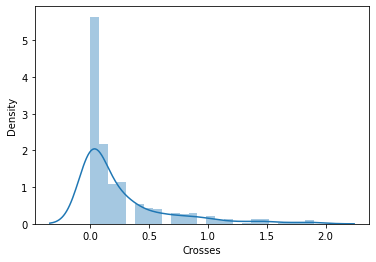

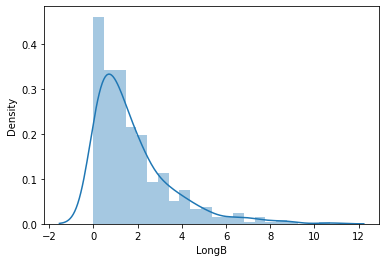

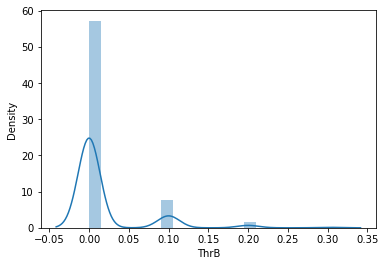

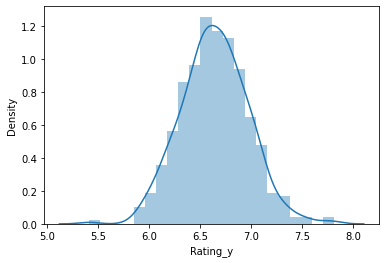

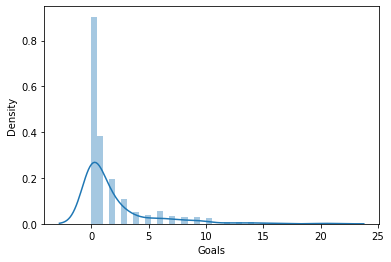

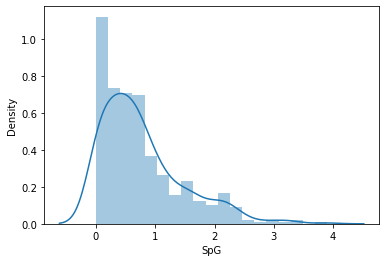

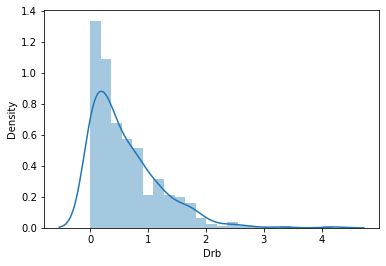

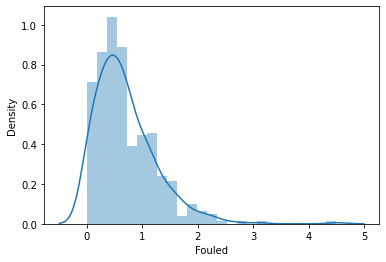

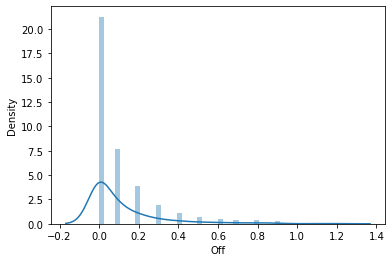

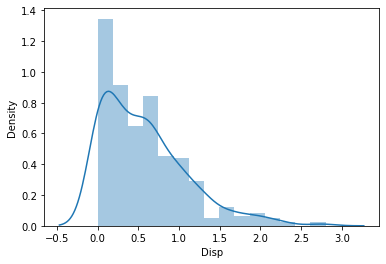

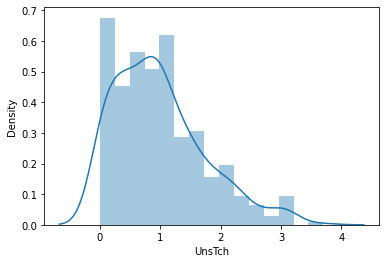

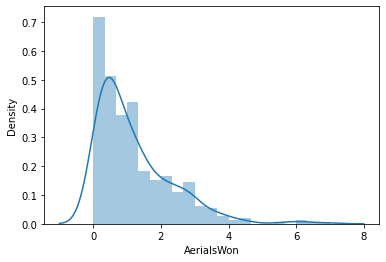

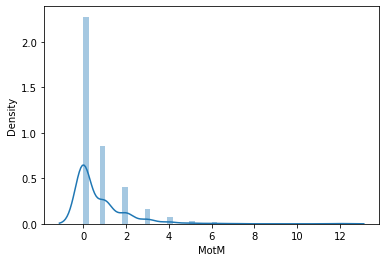

In [148]:
for i in premier_df_num.columns:
    sns.distplot(premier_df_num[i])
    plt.show()